# Regression drill

This is a simple regression drill. Try to write the minimal code to finish the pipeline.

1. Load and store the data from the existing `diabetes` dataset from `scikit-learn`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.load_diabetes()
X, y = dataset.data, dataset.target

2. Explore your data by viewing and calculating some basic statistical details like percentiles and mean. Use the pandas library!

In [2]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

In [3]:
df = sklearn_to_df(dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [5]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


3. Create some scatter plots or any other kind of plots that help you understand the data.

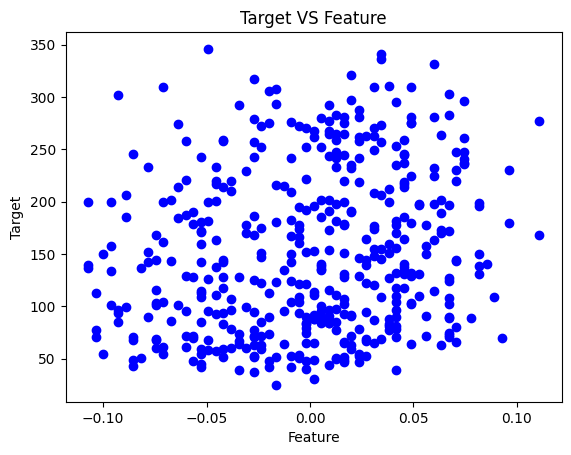

In [6]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], y, color="blue")

ax.set_xlabel("Feature")
ax.set_ylabel("Target")
plt.title("Target VS Feature")
plt.show()

In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [8]:
def feature_target_plot(Feature):
    features_dict = {name: idx for idx, name in enumerate(dataset.feature_names)}

    fig, ax = plt.subplots()
    ax.scatter(X[:, features_dict[Feature]], y, color="blue")

    ax.set_xlabel(f"{Feature}")
    ax.set_ylabel("Target")
    plt.title(f"Target VS {Feature}")

In [9]:
interact(feature_target_plot, Feature=dataset.feature_names)

plt.show()


interactive(children=(Dropdown(description='Feature', options=('age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's…

4. Create a model and compute the accuracy of its predictions. 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
regressor.score(X_train, y_train)

0.49207105028647846

In [13]:
regressor.predict(X_test)

array([ 69.80081941, 109.06154238,  71.46633818, 144.06910505,
       155.63200007, 132.24742142, 170.50393114, 174.37023569,
       115.39161295, 104.11497998, 102.00591308, 154.4876891 ,
       106.83214061, 294.40454553, 179.23304345, 146.53399944,
       287.60256663,  61.27218358, 110.6502548 , 230.7034094 ,
       221.16396774, 160.64662728, 197.3815764 , 101.69521616,
        63.75741687, 116.21275688, 126.11137152, 172.26400959,
       158.72892759, 119.90734347,  89.36744441, 206.26155513,
       155.0737102 , 147.72128505, 121.87064326, 162.70392684,
       153.15696539, 225.90982385, 151.09740866, 123.76350227,
       215.68306825, 277.08772327, 197.5097744 ,  98.37958761,
        87.01413405, 255.73133517, 177.43196945, 229.21291619,
       193.04569934,  94.80818223, 140.46783797, 115.64731066,
       212.51997621, 167.18686932, 135.9572707 , 112.23232463,
       227.48591128, 230.43941831,  58.1482718 ,  94.56841681,
        56.64892376, 159.27060696, 178.76070026,  79.63

In [14]:
regressor.score(X_test, y_test)

0.5939529975895661

5. Play with other datasets such as `boston` from scikit-learn, or find datasets online such as [this one](https://www.kaggle.com/dmvreddy91/usahousing) or [this one](https://www.kaggle.com/hellbuoy/car-price-prediction). Careful, not all the datasets are appropriate for regression, so make sure to specify that in your search.